In [1]:
import numpy as np
import pandas as pd
from causallearn.search.ConstraintBased.PC import pc

In [2]:
data = pd.read_csv('prepared_for_causal.csv')
data = np.array(data)


cg = pc(data, alpha=0.05,  stable=True, uc_rule=0, uc_priority=2, verbose=False, show_progress=True)



FileNotFoundError: [Errno 2] No such file or directory: 'prepared_for_causal.csv'

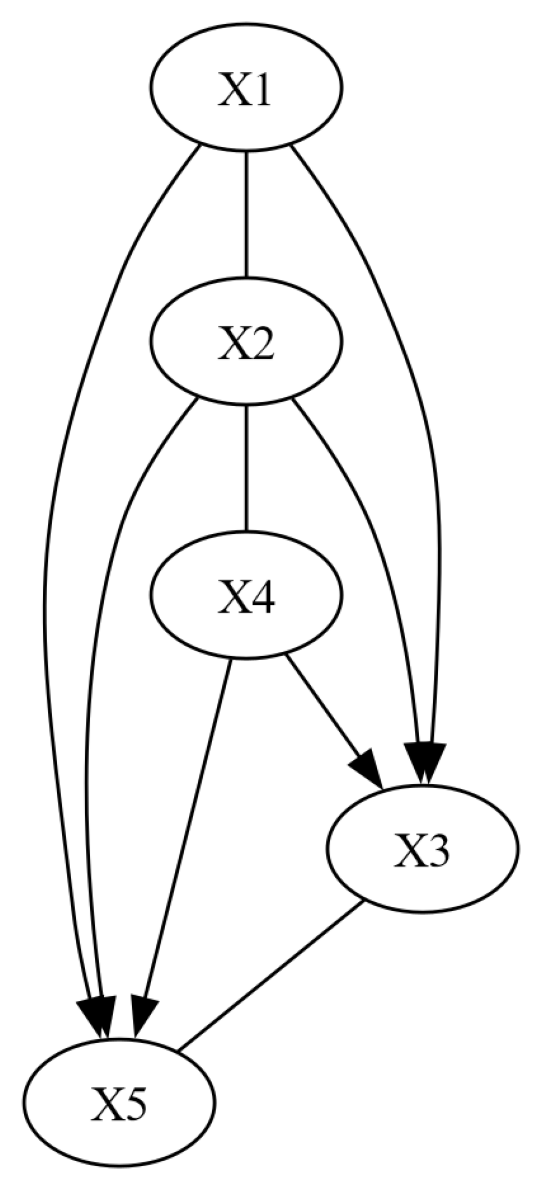

In [ ]:
# visualization using pydot
cg.draw_pydot_graph()

In [ ]:
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')

Green: undirected; Blue: directed; Red: bi-directed



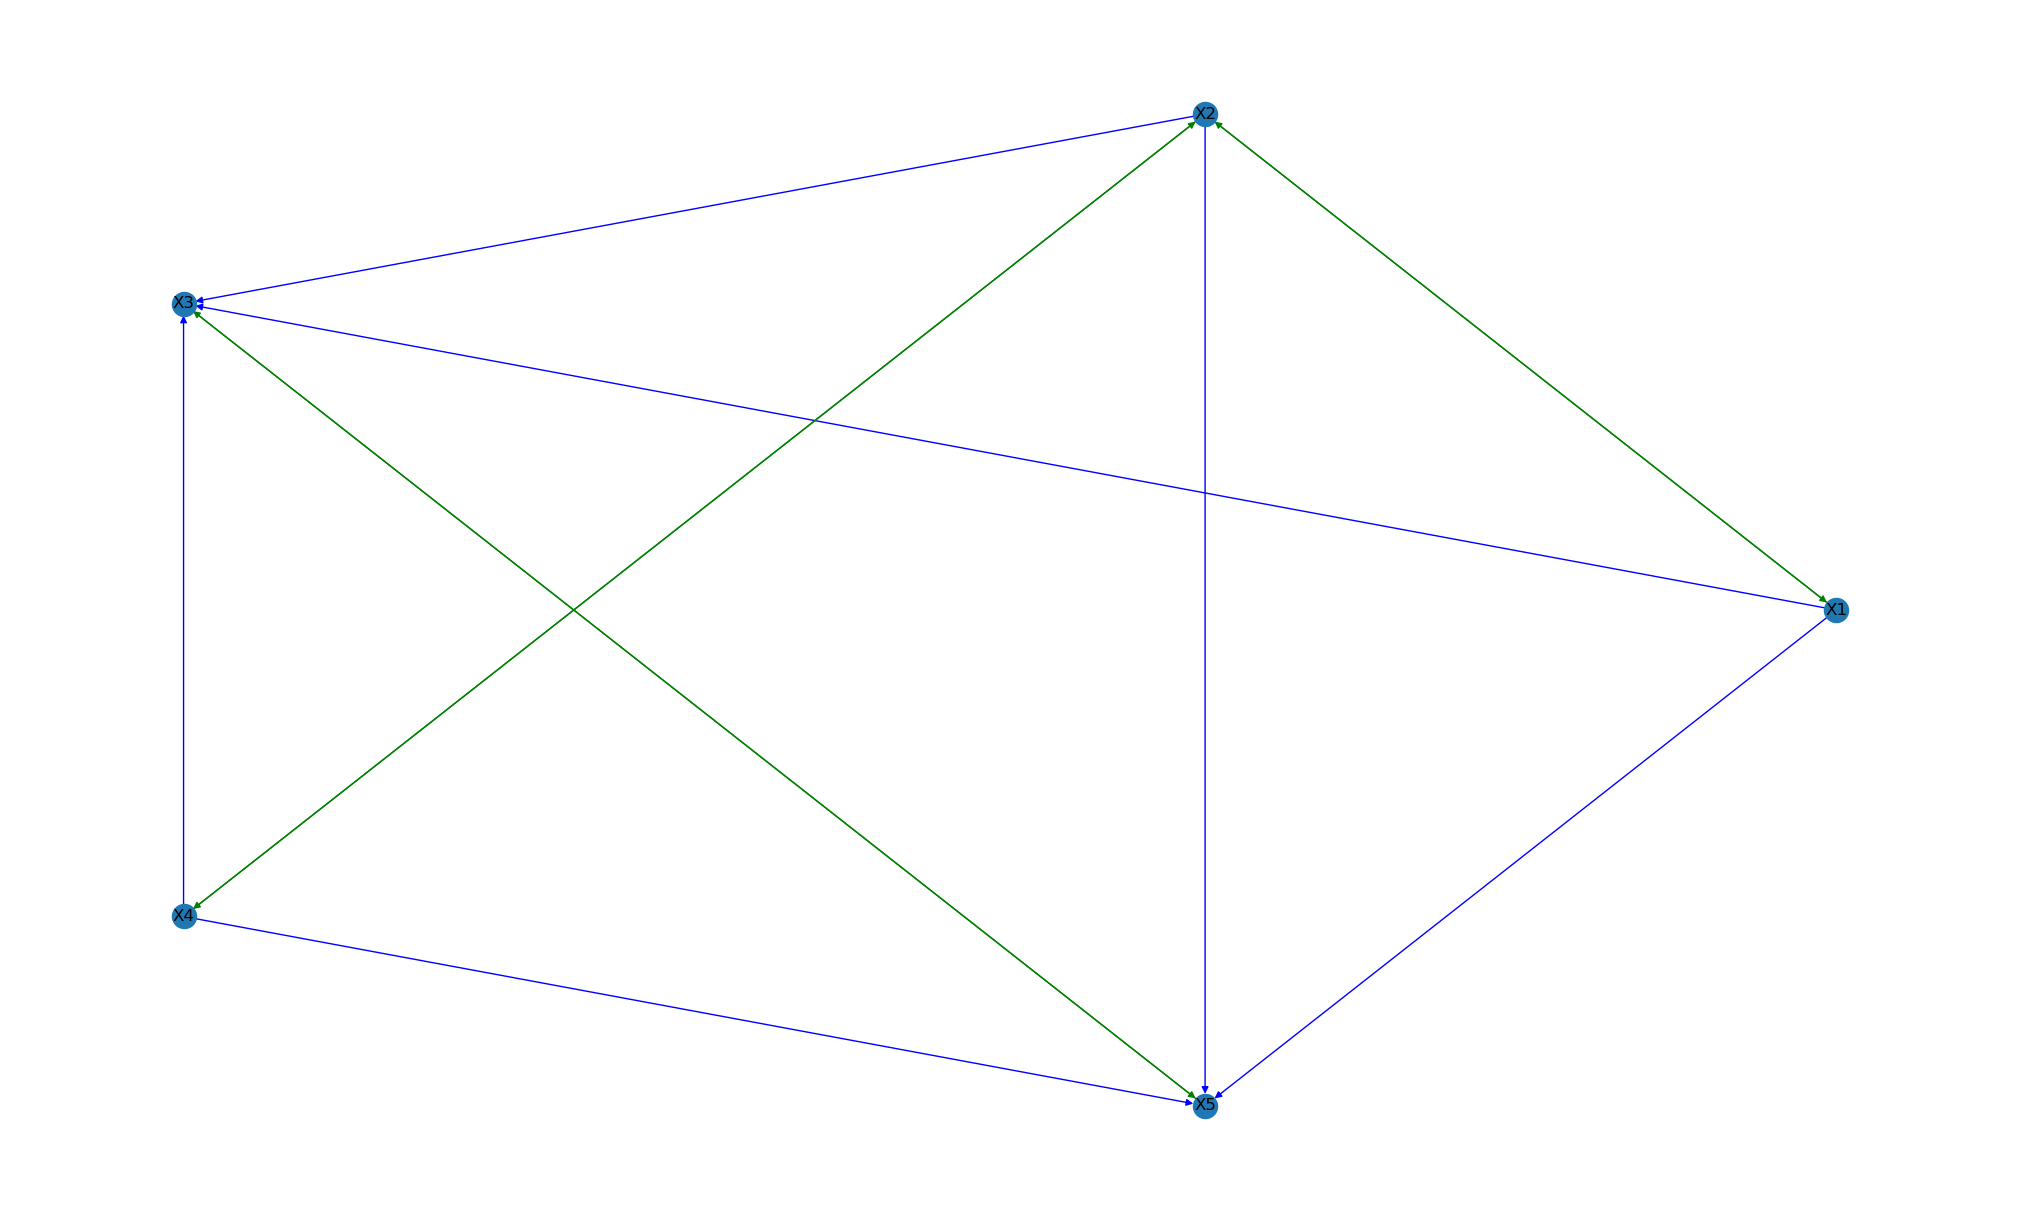

In [ ]:
# visualization using networkx
cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

In [ ]:
from causallearn.search.ConstraintBased.FCI import fci

# default parameters
g, edges = fci(data)

# # or customized parameters
# g, edges = fci(data, independence_test_method, alpha, depth, max_path_length,
#     verbose, background_knowledge, cache_variables_map)

# visualization
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(g)
pdy.write_png('simple_test.png')



  0%|          | 0/5 [00:00<?, ?it/s]

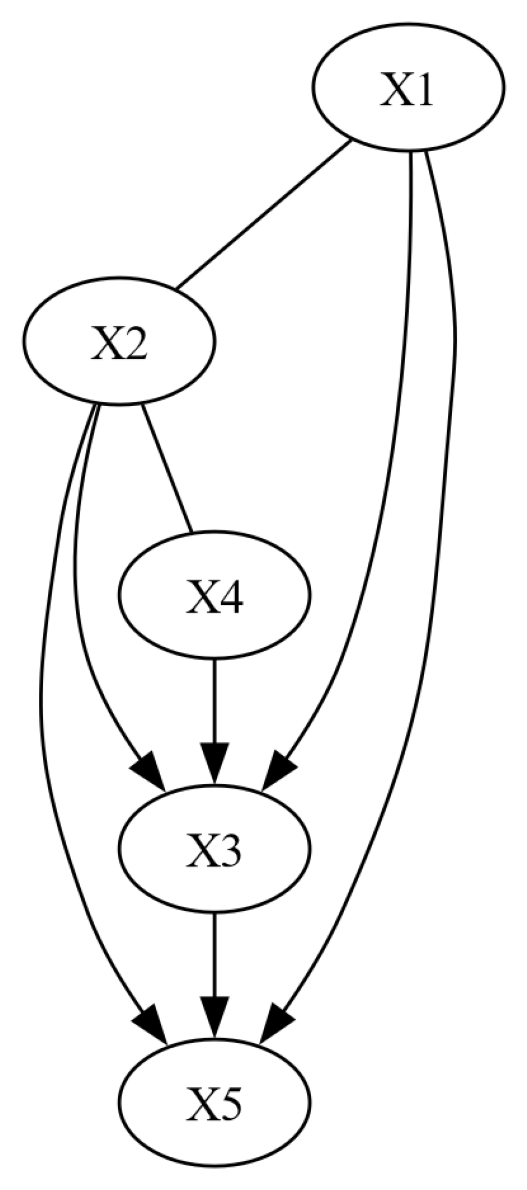

In [ ]:
from causallearn.search.ScoreBased.GES import ges

# default parameters
Record = ges(data)
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('simple_test.png')

In [3]:
from causallearn.search.ScoreBased.ExactSearch import bic_exact_search
dag_est, search_stats = bic_exact_search(data, super_graph=None, search_method='astar',
                 use_path_extension=True, use_k_cycle_heuristic=True,
                 k=6, verbose=False, max_parents=15)
print(dag_est)

print(search_stats)

NameError: name 'data' is not defined

In [ ]:
from causallearn.search.FCMBased import lingam
model = lingam.ICALiNGAM(42, max_iter=20)
model.fit(data)
print(model.causal_order_)
print(model.adjacency_matrix_.T)

[4, 0, 2, 1, 3]
[[ 0.         -0.57584736  0.56372904 -0.05238804  0.        ]
 [ 0.          0.          0.          1.05019492  0.        ]
 [ 0.         -0.40544801  0.          0.10531652  0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [18.42625015 -3.22681911 10.90033426  1.7754998   0.        ]]
